In [844]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize

In [845]:
# reading data
# X1 = for test exam 1
# X2 = for test exam 2
# X3 = for test exam 3
# X4 = for final exam
data= pd.read_csv('dataset2.csv')
print(data.shape)
data.head()

(25, 4)


,X1,X2,X3,X4
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [846]:
# extracting X and Y
X = data[['X1','X2','X3']]
Y = data['X4']

In [847]:
# initialize parameters
learning_rate = 0.0009
iterations = 5000

In [848]:
# initialize theta
theta = np.zeros((data.shape[1])) # rows = data.shape[1], col = 1

In [849]:
# visualize the dataset


In [850]:
# normalize the features
X = ( X - X.mean() ) / X.std()
# Add a 1 column to the start to allow vectorized gradient descent
tmpX = np.ones((X.shape[0],X.shape[1]+1))
tmpX[:,1:] = X
X = tmpX
n = len(X)
print(X.shape)

(25, 4)


In [851]:
# hypothesis
def h( theta, X, Y ):
    return np.dot(X,theta.T) - Y;

In [852]:
# cost generator
def cost_func( theta, X, Y ):
    return 1/2 * np.average(np.square( h( theta,X,Y ) ))

In [853]:
# gradient descent function
def gradient_descent( theta, X, Y, learning_rate, iterations ):
    cost_graph = np.zeros(iterations)
    for i in range(iterations):
        cost_graph[i] = cost_func(theta,X,Y)
        theta = theta - ( learning_rate * (1/n) * np.dot(X.T,h(theta,X,Y)) )
    return theta, cost_graph

Text(0.5, 1.0, 'cost per iteration')

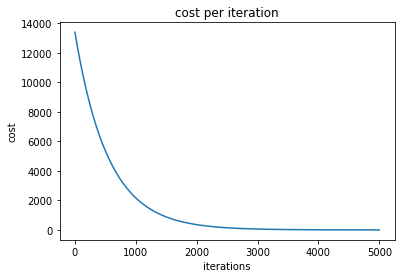

In [854]:
theta, cost_graph = gradient_descent(theta,X,Y,learning_rate,iterations)
fig, ax = plt.subplots()
ax.plot(cost_graph)
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax.set_title('cost per iteration')

In [855]:
# predicted values X4
pred_Y = np.dot(theta,X.T)

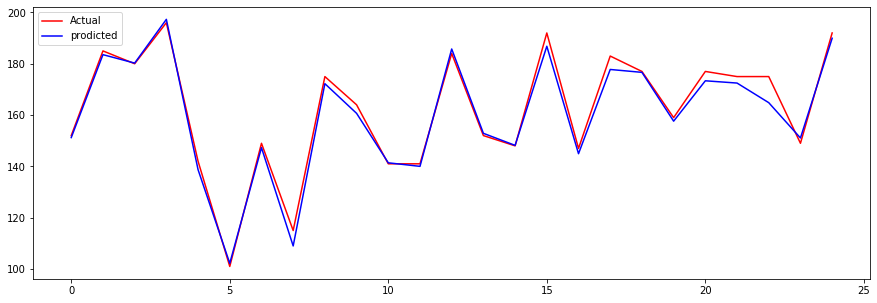

In [856]:
fig, ax = plt.subplots(figsize=(15,5))
pred_Y = np.ravel(pred_Y) # Flatten an array into a contiguous array
a1, = plt.plot(Y,color="red")
a2, = plt.plot(pred_Y,color="blue")
plt.legend([a1,a2], ["Actual", "prodicted"])

In [857]:
# R^2 square to find how good the model is
# the more it close to 1, the more predictive power the model has.
from sklearn import metrics
r2 = metrics.r2_score(Y, zs)
print('R-square : ',r2)

R-square :  0.9804110781748645
